# Applied Cartopy Example

### Import packages

In [48]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

### Cartopy is a package designed to process geospatial data and produce maps and other geospatial data products. 

### Cartopy utilizes NumPy, PROJ, and Shapely libraries, and it's programmatic interface is built on top of Matplotlib

### Cartopy is able to transform point, lines, vectors, polygons, and images between object oriented projections.

## Creating basic map with Cartopy and Matplotlib

### Use the PlateCarree projection to create a simple world map with coastlines added

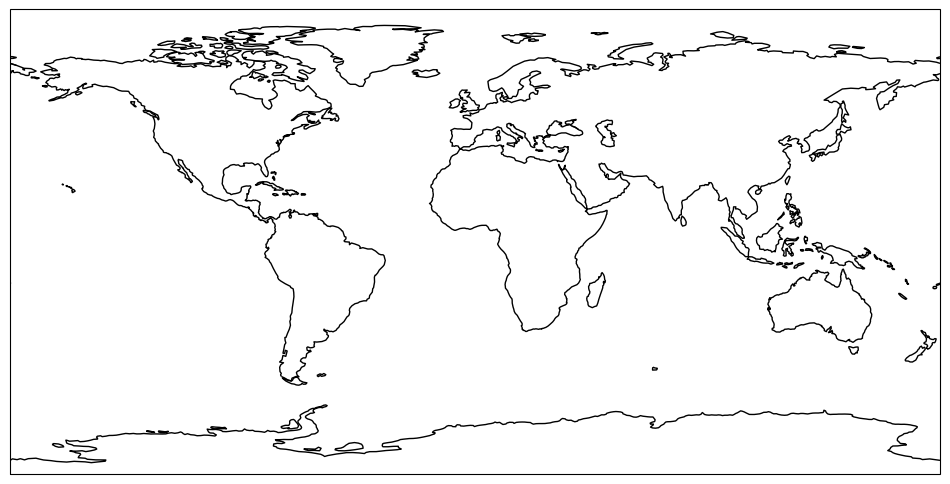

In [49]:
# creates a 12x10 figure
plt.figure(figsize=(12,10))

ax = plt.axes(projection=ccrs.PlateCarree())   # sets map projection to PlateCarree, simple lat-long projection
ax.coastlines()   # adds coastlines at 110 m resolution

plt.show()  # shows the figure

# Hurricane Michael

## In this Cartopy example, we will be reading in Hurdat and NCEP/NCEI Optimum Interpolation Sea Surface Temperature (OISST) data from Hurricane Michael, which made landfall near Mexico Beach, FL on October 11, 2018. Michael was a cat 5 hurricane at its peak intensity. It began as a relatively weak low-pressure system in the Western Carribean on October 7. Michael underwent rapid intensification between October 9 and 10, and by October 11, Michael reached a Cat 5 with winds of up to 160 mph.

## We will need to read in Hurdat text files, which I cleaned up in the text file to select specifically Michael data. This included changing longitude data into a readable value

### Importing necessary packages, reading in data and cleaning up file

In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [51]:
file_path = 'hurricane_michael_hurdat.txt'

In [52]:
with open(file_path, 'r') as file:
    lines = file.readlines()

data_list = []
for line in lines:
    parts = line.strip().split(',')
    if len(parts) > 20:
        parts = parts[:20]
    data_list.append(parts)

# Define the columns based on your data
columns = ['date', 'time', 'empty', 'storm', 'latitude', 'longitude', 'wind_speed', 'pressure', 
           'other_data_1', 'other_data_2', 'other_data_3', 'other_data_4', 'other_data_5', 'other_data_6', 
           'other_data_7', 'other_data_8', 'other_data_9', 'other_data_10', 'other_data_11', 'other_data_12']

# Convert the list of lists into a DataFrame
df = pd.DataFrame(data_list, columns=columns)

# Preview the DataFrame
print(df.head())

       date   time empty storm latitude longitude wind_speed pressure  \
0  20181006   1800          LO     17.8     -86.6         25     1006   
1  20181007   0000          LO     18.1     -86.9         25     1004   
2  20181007   0600          TD     18.4     -86.8         30     1004   
3  20181007   1200          TS     18.8     -86.4         35     1003   
4  20181007   1800          TS     19.1     -85.7         45      999   

  other_data_1 other_data_2 other_data_3 other_data_4 other_data_5  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3          120          180            0            0            0   
4          120          180            0            0            0   

  other_data_6 other_data_7 other_data_8 other_data_9 other_data_10  \
0            0            0            0            0             0  

### Remove the unncessary columns using the .iloc function

In [53]:
michael_sub = df.iloc[:,0:8]
print(michael_sub)

        date   time empty storm latitude longitude wind_speed pressure
0   20181006   1800          LO     17.8     -86.6         25     1006
1   20181007   0000          LO     18.1     -86.9         25     1004
2   20181007   0600          TD     18.4     -86.8         30     1004
3   20181007   1200          TS     18.8     -86.4         35     1003
4   20181007   1800          TS     19.1     -85.7         45      999
5   20181008   0000          TS     19.7     -85.5         50      996
6   20181008   0600          TS     20.2     -85.4         60      984
7   20181008   1200          HU     20.9     -85.1         65      982
8   20181008   1800          HU     21.7     -85.1         75      977
9   20181009   0000          HU     22.7     -85.2         85      971
10  20181009   0600          HU     23.7     -85.8         85      973
11  20181009   1200          HU     24.6     -86.2         90      968
12  20181009   1800          HU     25.6     -86.4        100      961
13  20

### Get rid of the empty collumn 

In [54]:
michael_final = michael_sub.drop(michael_sub.columns[2], axis=1)

In [55]:
print(michael_final)

        date   time storm latitude longitude wind_speed pressure
0   20181006   1800    LO     17.8     -86.6         25     1006
1   20181007   0000    LO     18.1     -86.9         25     1004
2   20181007   0600    TD     18.4     -86.8         30     1004
3   20181007   1200    TS     18.8     -86.4         35     1003
4   20181007   1800    TS     19.1     -85.7         45      999
5   20181008   0000    TS     19.7     -85.5         50      996
6   20181008   0600    TS     20.2     -85.4         60      984
7   20181008   1200    HU     20.9     -85.1         65      982
8   20181008   1800    HU     21.7     -85.1         75      977
9   20181009   0000    HU     22.7     -85.2         85      971
10  20181009   0600    HU     23.7     -85.8         85      973
11  20181009   1200    HU     24.6     -86.2         90      968
12  20181009   1800    HU     25.6     -86.4        100      961
13  20181010   0000    HU     26.6     -86.5        110      952
14  20181010   0600    HU

## Creating a map of Hurricane Michael's track using Cartopy

### Convert the lat and lon into numerics

In [56]:
michael_final['latitude'] = pd.to_numeric(michael_final['latitude'])
michael_final['longitude'] = pd.to_numeric(michael_final['longitude'])

latitudes = michael_final['latitude']
longitudes = michael_final['longitude']

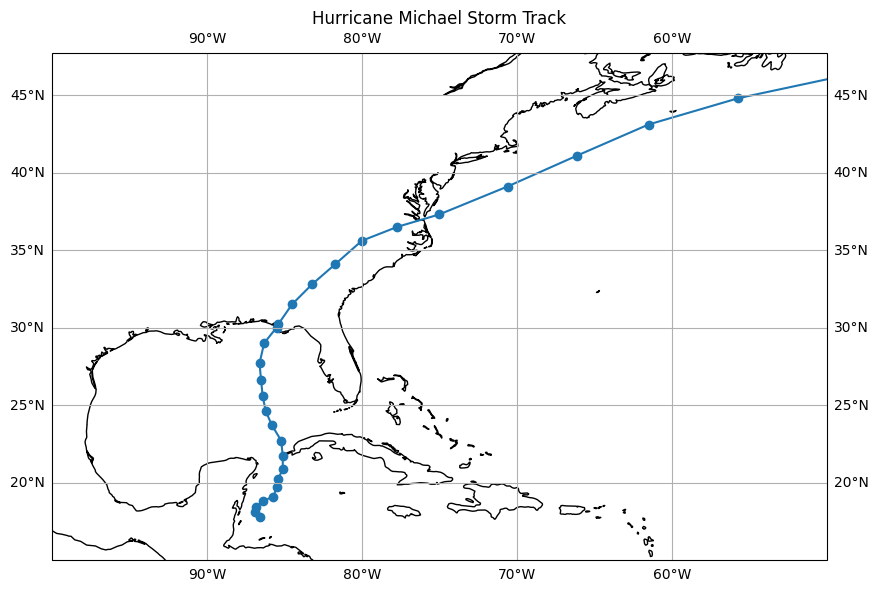

In [57]:
# plot the figure
fig, ax = plt.subplots(figsize=(10,10),subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-100, -50, 15, 45]) # set geographic extent to cover storm's track
ax.coastlines(resolution='50m') # add coastlines
ax.gridlines(draw_labels=True) # add grids

#plot the lat lon data of michael's track, add title to plot
ax.plot(michael_final['longitude'], michael_final['latitude'], marker ='o', label = 'Michael Storm Track')
ax.set_title("Hurricane Michael Storm Track")

# show figure
plt.show()


# Hurricane Micheal underwent rapid intensification just prior to making landfall in the Pandhandle of Florida. Lets explore sea surface temperatures closer to the coast around the time of landfall.

### Open the NetCDF dataset using xarray open_dataset function

In [58]:
# open dataset using xarray 
sst_data_1009 = xr.open_dataset('oisst-avhrr-v02r01.20181009.nc')
sst_data_1010 = xr.open_dataset('oisst-avhrr-v02r01.20181010.nc')
sst_data_1011 = xr.open_dataset('oisst-avhrr-v02r01.20181011.nc')


### Using pandas to_datetime function, convert our time variable into a datetime format that is easier to work with in plotting

In [59]:
# convert the time variable for each day leading up to land fall using pandas datetime functions
sst_data_1009['time'] = pd.to_datetime(sst_data_1009['time'].values)
sst_1009 = sst_data_1009['sst']
sst_data_1010['time'] = pd.to_datetime(sst_data_1010['time'].values)
sst_1010 = sst_data_1010['sst']
sst_data_1011['time'] = pd.to_datetime(sst_data_1011['time'].values)
sst_1011 = sst_data_1011['sst']

### To plot the figures, you must use Matplotlib contourf function that plots the 2D data for our geographical region in the Gulf of America ;)

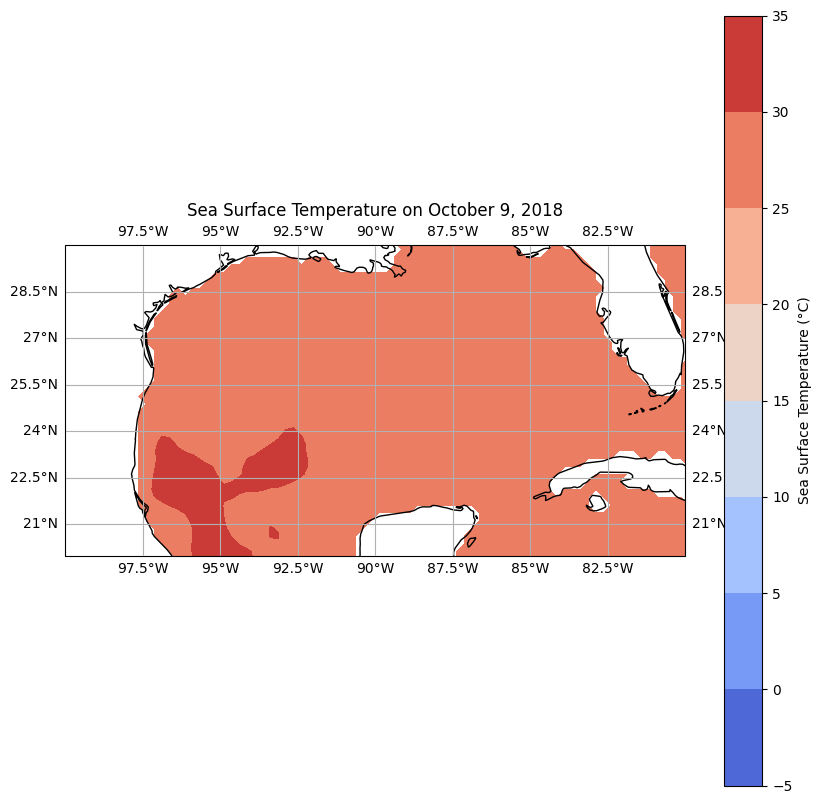

In [60]:
# plot the figure
fig, ax = plt.subplots(figsize=(10,10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-100, -80, 20, 30])  # set extent to Gulf of America 
ax.coastlines(resolution='50m')  # add coastlines
ax.gridlines(draw_labels=True)  # add grids

# Use Matplotlib contourf to plot 2D SST data at surface level
sst_1009_plot = ax.contourf(sst_1009.lon, sst_1009.lat, sst_1009.isel(time=0, zlev=0), cmap='coolwarm', transform=ccrs.PlateCarree())

# add colorbar to show temperature in Celsius
cbar = plt.colorbar(sst_1009_plot, ax=ax, orientation='vertical')
cbar.set_label('Sea Surface Temperature (°C)')

# Give plot a title
plt.title('Sea Surface Temperature on October 9, 2018')

# show plot
plt.show()

### Do it again for the next day...

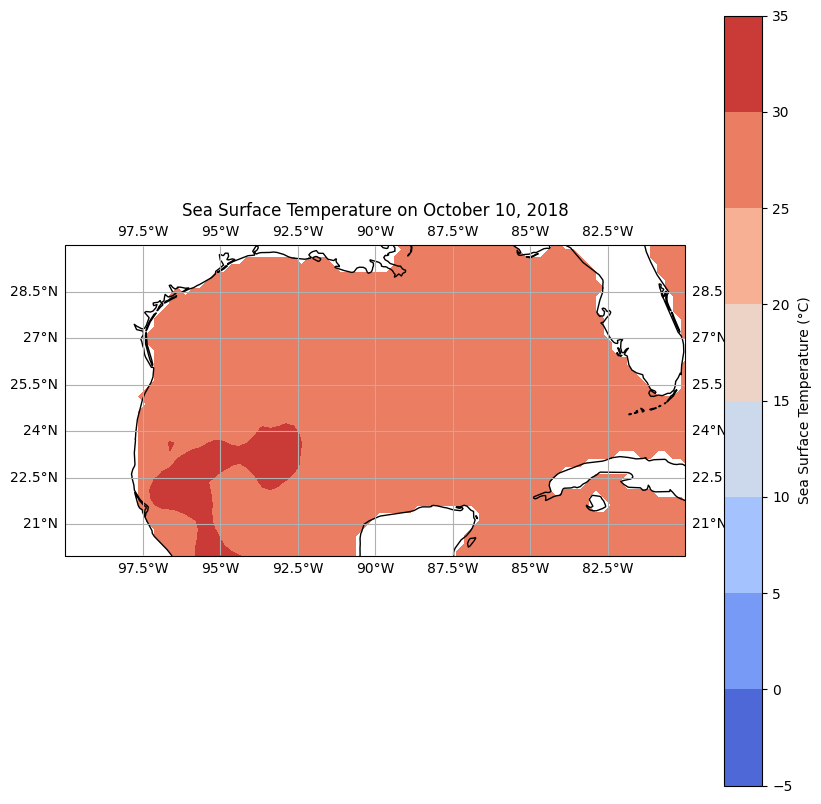

In [61]:
# plot the figure
fig, ax = plt.subplots(figsize=(10,10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-100, -80, 20, 30])  # set extent to Gulf of America (teehee)
ax.coastlines(resolution='50m')  # add coastlines
ax.gridlines(draw_labels=True)  # add grids

# Use Matplotlib contourf to plot 2D SST data at surface level
sst_1010_plot = ax.contourf(sst_1010.lon, sst_1010.lat, sst_1010.isel(time=0, zlev=0), cmap='coolwarm', transform=ccrs.PlateCarree())

# add colorbar to show temperature in Celsius
cbar = plt.colorbar(sst_1010_plot, ax=ax, orientation='vertical')
cbar.set_label('Sea Surface Temperature (°C)')

# Give plot a title
plt.title('Sea Surface Temperature on October 10, 2018')

# show plot
plt.show()

### Not much change but why not once more using the same functions...

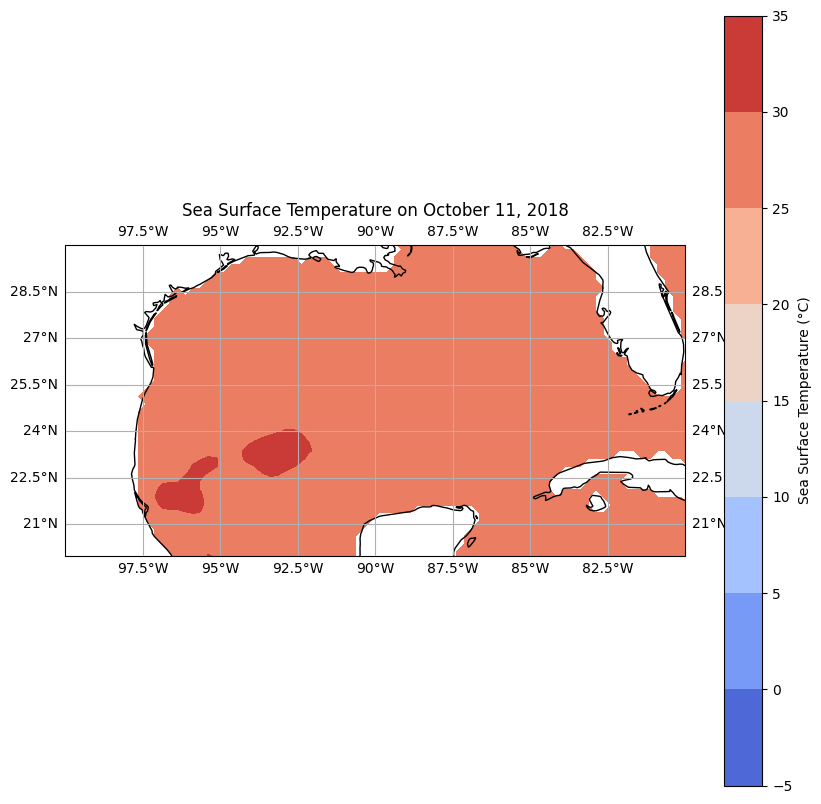

In [62]:
# plot the figure
fig, ax = plt.subplots(figsize=(10,10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-100, -80, 20, 30])  # set extent to Gulf of America (teehee)
ax.coastlines(resolution='50m')  # add coastlines
ax.gridlines(draw_labels=True)  # add grids

# Use Matplotlib contourf to plot 2D SST data at surface level
sst_1011_plot = ax.contourf(sst_1011.lon, sst_1011.lat, sst_1011.isel(time=0, zlev=0), cmap='coolwarm', transform=ccrs.PlateCarree())

# add colorbar to show temperature in Celsius
cbar = plt.colorbar(sst_1011_plot, ax=ax, orientation='vertical')
cbar.set_label('Sea Surface Temperature (°C)')

# Give plot a title
plt.title('Sea Surface Temperature on October 11, 2018')

# show plot
plt.show()